In [1]:
import pandas as pd

data = pd.read_csv(R"C:\Users\gavri\ML\datasets\titanic\train.csv")
print(data.shape)
print(data.dtypes)
print(data.head(5))
print(data.isnull().sum())

data['Age'] = data['Age'].fillna(data['Age'].median())

print(data['Age'].isnull().sum())
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [3]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [6]:
from sklearn.model_selection import train_test_split
x = data.drop("Survived", axis=1)
y = data["Survived"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [8]:
xtrain = xtrain.astype('float32')
ytrain = ytrain.astype('float32')
xt = xtrain.to_numpy()
yt = ytrain.to_numpy()
xtrain = torch.tensor(xt)
ytrain = torch.tensor(yt)

print(xtrain)

tensor([[1.0000, 1.0000, 0.5665,  ..., 0.0556, 0.0000, 1.0000],
        [2.0000, 1.0000, 0.2837,  ..., 0.0254, 0.0000, 1.0000],
        [3.0000, 1.0000, 0.3968,  ..., 0.0155, 0.0000, 1.0000],
        ...,
        [3.0000, 1.0000, 0.5099,  ..., 0.0275, 0.0000, 1.0000],
        [1.0000, 0.0000, 0.1706,  ..., 0.2342, 0.0000, 1.0000],
        [1.0000, 1.0000, 0.2586,  ..., 0.1509, 0.0000, 1.0000]])


In [257]:
class Net(nn.Module):
    def __init__(self): # инициализация модели
        super(Net, self).__init__()
        self.fc1 = nn.Linear(8, 50) #7 - число входных нейронов, 50 - количество нейронов на первом скрытом слое
        self.relu = nn.LeakyReLU()
        self.fc2 = nn.Linear(50, 25)
        self.fc3 = nn.Linear(25, 10)#на входе 100 нейронов, на выходе 10 - просто добавим нейронов
        self.fc4 = nn.Linear(10, 5)
        self.fc5 = nn.Linear(5, 2) #Два нейрона на выходе - выжил или не выжил
    def forward(self, X):
        X = self.relu(self.fc1(X))
        X = self.relu(self.fc2(X))
        X = self.relu(self.fc3(X))
        X = self.relu(self.fc4(X))
        X = self.fc5(X)
        
        return X

model = Net()

In [370]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [315]:
ytrain = ytrain.long()

In [361]:
for epoch in range(25):
    optimizer.zero_grad()
    output = model(xtrain)
    loss = criterion(output, ytrain)
    loss.backward()
    optimizer.step()
    output = torch.argmax(output, axis=1)
    

In [362]:
ytest = ytest.long()

In [371]:
model.eval() #перевод модели в режим оценки
with torch.no_grad(): #отключаем подсчет градиентов для оптимизации памяти
    predictions  = model(xtest) # получаем тенсор из предсказаний вероятности класса
    predicted_labels = torch.argmax(predictions, axis=1)#получаем класс с максимальной вероятностью
    acc = accuracy_score(yt, predicted_labels)
    print(f"Accuracy: {acc:.4f}")

TypeError: linear(): argument 'input' (position 1) must be Tensor, not DataFrame

In [364]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [365]:
y = ytest.cpu().numpy()
y_pred = predicted_labels.cpu().numpy()

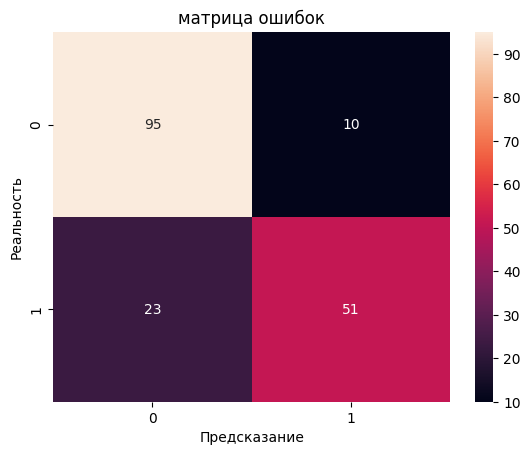

In [366]:
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Предсказание")
plt.ylabel("Реальность")
plt.title("матрица ошибок")
plt.show()

In [367]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [369]:
data = pd.read_csv(R"C:\Users\gavri\ML\datasets\titanic\test.csv")
data['Age'] = data['Age'].fillna(data['Age'].median())
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
scaler = MinMaxScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

xtest = data

In [ ]:
model2 = Net()


In [368]:
submission = pd.DataFrame({
    "PassengerId": data["PassengerId"],
    "Survived": y_pred
})


NameError: name 'ydata' is not defined

In [245]:
submission.to_csv("submission.csv", index=False)